In [251]:
# %pylab inline
from gplearn.genetic import SymbolicRegressor
from sklearn.utils.random import check_random_state
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import graphviz
import pandas
from sympy import *

init_printing()

<AxesSubplot:xlabel='t', ylabel='cov'>

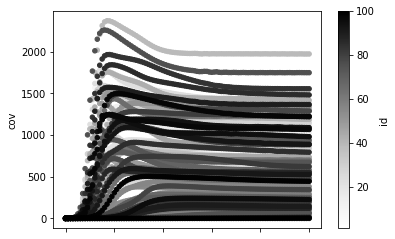

In [252]:
# Ground truth
header = ["cov","t","uC0","sC0","ur","sr","up","sp","id"]

train_data = pandas.read_csv("../data/Simulations/symbolic_reggresion/train.csv",names = header)
test_data = pandas.read_csv("../data/Simulations/symbolic_reggresion/test.csv",names = header)

train_data.plot(x = "t", y = "cov",c = "id", kind = "scatter")

In [253]:
rng = check_random_state(0)

cols = ['ur','sr']

train_data_t = train_data[train_data.t.eq(1)]

# Training samples
y_train = train_data_t["cov"]
x_train = train_data_t.loc[:,cols]

#testing samples
y_test = test_data["cov"]
x_test = test_data.loc[:,cols]




In [255]:
est_gp = SymbolicRegressor(population_size=5000,
                           generations=20, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.5, random_state=0,
                           function_set = ('add', 'sub', 'mul', 'div','log'))

est_gp.fit(x_train, y_train)



    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    25.87      4.23952e+15        7          11.7949           9.3254      1.17m
   1    17.65      3.77321e+06       46          10.3592          11.2812     53.88s
   2    18.51      1.72859e+06       46          9.46744          19.1314     50.62s
   3    19.12          90750.7       38          9.59741          15.0818     50.87s
   4    18.14            58722       37          9.70874          17.0139      1.05m
   5    14.86          55899.3       18          10.4338           16.758     44.83s
   6     9.93      1.66883e+08        7          10.0972          24.6047     41.85s
   7     7.42          36650.3        7          9.99272          25.5446     33.60s
   8     6.85          57717.2        7          9.99021          25.5672  

SymbolicRegressor(function_set=('add', 'sub', 'mul', 'div', 'log'),
                  max_samples=0.9, p_crossover=0.7, p_hoist_mutation=0.05,
                  p_point_mutation=0.1, p_subtree_mutation=0.1,
                  parsimony_coefficient=0.5, population_size=5000,
                  random_state=0, stopping_criteria=0.01, verbose=1)

In [256]:
print(est_gp._program)

add(mul(X1, 0.823), X1)


In [257]:
est_gp.score(x_test, y_test)

In [259]:
converter = {
    'sub': lambda x, y : x - y,
    'div': lambda x, y : x/y,
    'mul': lambda x, y : x*y,
    'add': lambda x, y : x + y,
    'neg': lambda x    : -x,
    'pow': lambda x, y : x**y
}

exp = sympy.sympify(str(est_gp._program), locals=converter)
exp.simplify()

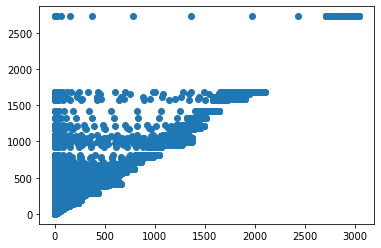

In [244]:
plt.scatter(y_test,est_gp.predict(x_test))

<AxesSubplot:xlabel='sr', ylabel='cov'>

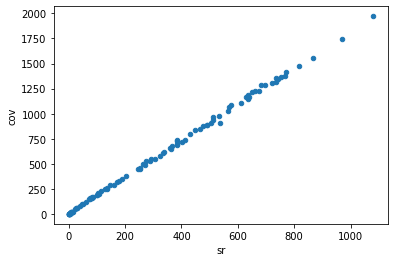

In [260]:
sub = train_data[train_data.t.eq(1.0)]
sub.plot("sr","cov", kind = "scatter")

<AxesSubplot:xlabel='sp', ylabel='cov'>

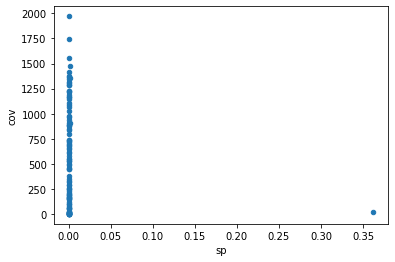

In [261]:
sub = train_data[train_data.t.eq(1.0)]
sub.plot("sp","cov", kind = "scatter")